In [1]:
# Import Meteostat library and dependencies
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Point, Daily, Hourly

In [2]:
# Fungsi untuk meminta input dari pengguna untuk rentang waktu
def get_date_input(prompt):
    return datetime.strptime(input(prompt), "%d-%m-%Y")

# Input dari pengguna untuk menentukan start dan end datetime
#start = get_date_input("Masukkan tanggal mulai (DD-MM-YYYY): ")
#end = get_date_input("Masukkan tanggal akhir (DD-MM-YYYY): ")

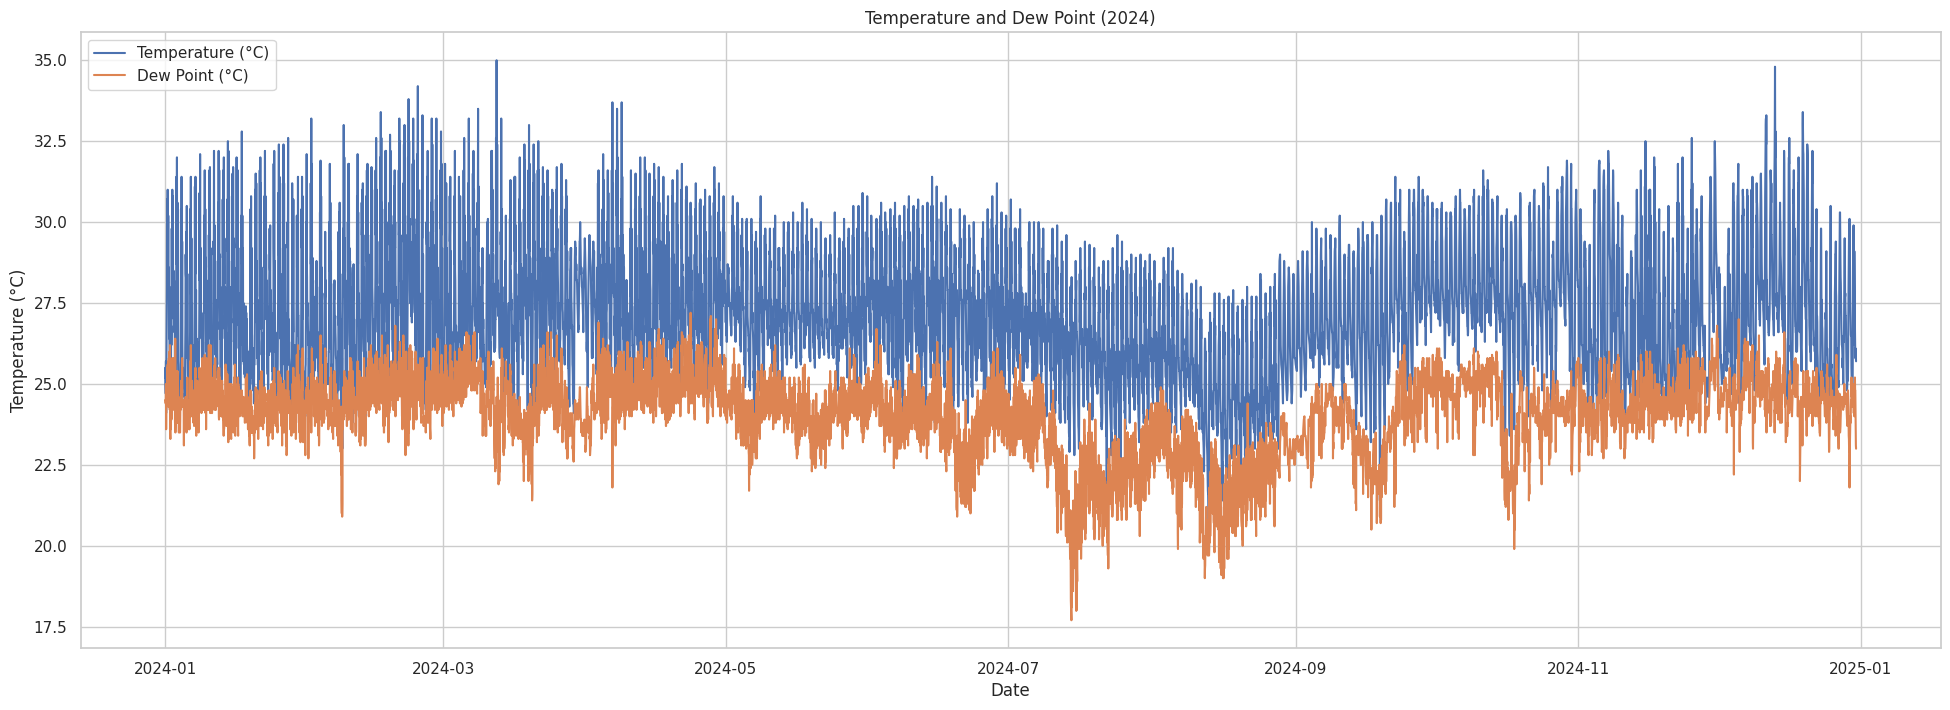

In [3]:
# Set seaborn theme
sns.set(style="whitegrid")

# Set time period
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)

# Get hourly data
data = Hourly(96805, start, end,"Asia/Jakarta")
data = data.fetch()

# Plot line chart with custom figure size
plt.figure(figsize=(24, 8))

# Plot temperature and dew point with labels
plt.plot(data.index, data['temp'], label='Temperature (°C)')
plt.plot(data.index, data['dwpt'], label='Dew Point (°C)')

# Show the plot with seaborn styling
plt.title('Temperature and Dew Point (2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()  # Menambahkan legenda untuk penjelasan garis
plt.show()

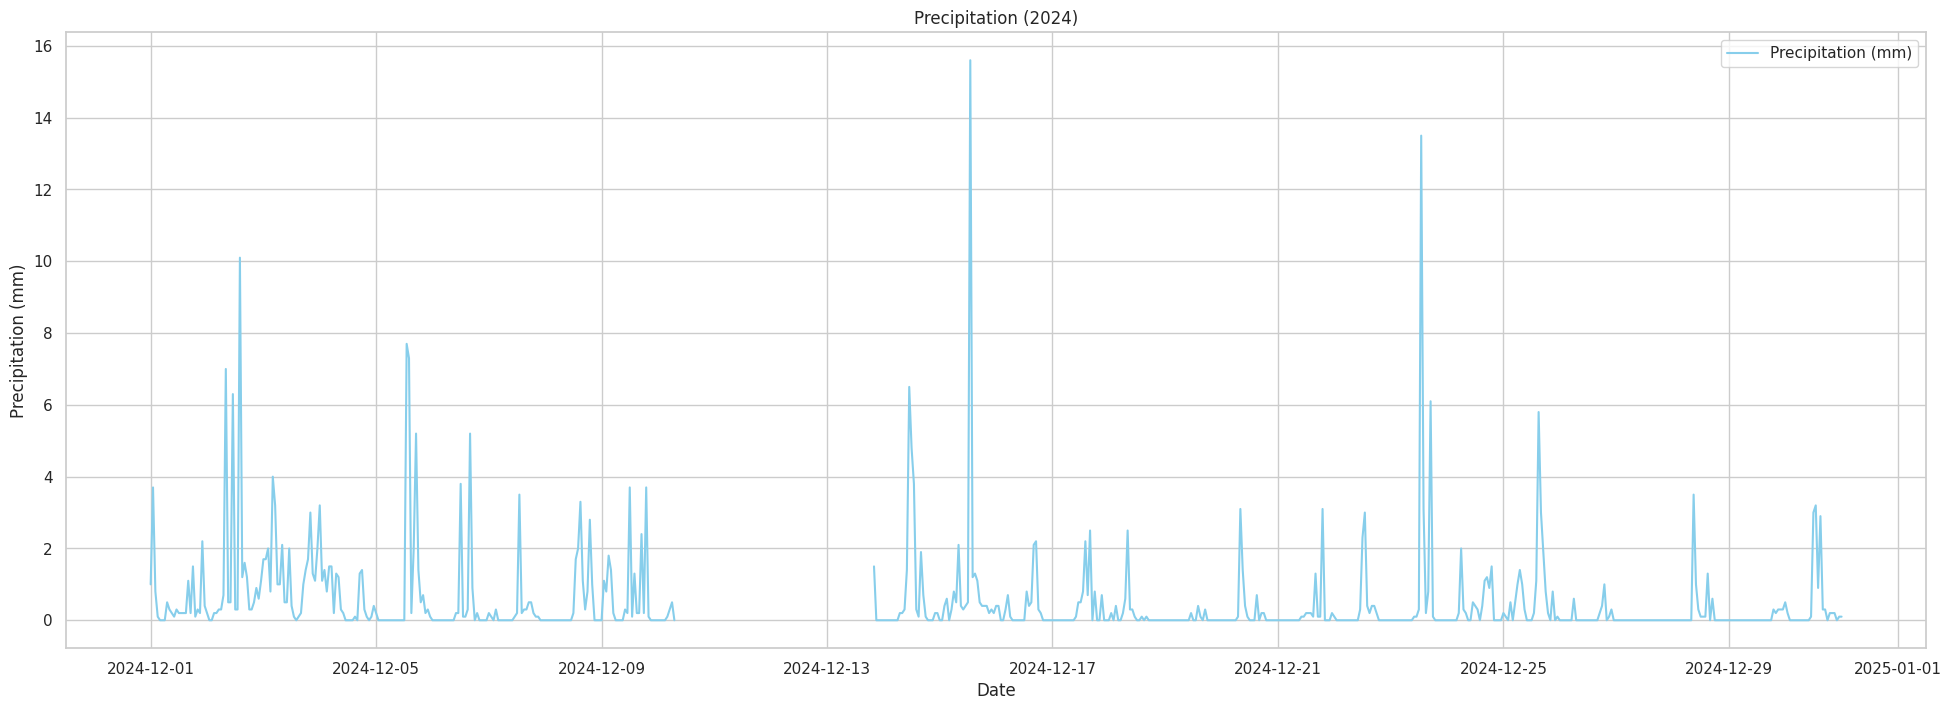

In [22]:
# Set seaborn theme
sns.set(style="whitegrid")

# Atur ukuran figure yang lebih besar
plt.figure(figsize=(24, 8))

# Plot precipitation menggunakan bar chart dengan lebar yang lebih kecil
plt.plot(data.index, data['prcp'],label='Precipitation (mm)', color='skyblue')  # width diatur ke 0.5

# Set judul dan label
plt.title('Precipitation (2024)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()  # Menambahkan legenda untuk menjelaskan variabel

# Tampilkan grafik
plt.show()


In [23]:
data.tail(10)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,date,day,hour
time,,,,,,,,,,,,,,
2024-12-30 15:00:00+07:00,29.1,24.0,74.0,2.9,NaN,262.0,40.0,NaN,1008.0,NaN,9.0,2024-12-30,30,15
2024-12-30 16:00:00+07:00,28.2,24.4,80.0,0.3,NaN,265.0,40.0,NaN,1007.9,NaN,8.0,2024-12-30,30,16
2024-12-30 17:00:00+07:00,27.7,24.7,84.0,0.3,NaN,276.0,36.4,NaN,1008.4,NaN,8.0,2024-12-30,30,17
2024-12-30 18:00:00+07:00,26.8,25.2,91.0,0.0,NaN,298.0,36.0,NaN,1009.0,NaN,3.0,2024-12-30,30,18
2024-12-30 19:00:00+07:00,26.2,24.8,92.0,0.2,NaN,298.0,31.3,NaN,1009.9,NaN,7.0,2024-12-30,30,19
2024-12-30 20:00:00+07:00,25.8,24.8,94.0,0.2,NaN,311.0,32.4,NaN,1010.8,NaN,7.0,2024-12-30,30,20
2024-12-30 21:00:00+07:00,26.1,24.1,89.0,0.2,NaN,273.0,36.7,NaN,1011.0,NaN,7.0,2024-12-30,30,21
2024-12-30 22:00:00+07:00,25.9,23.6,87.0,0.0,NaN,274.0,36.4,NaN,1011.1,NaN,3.0,2024-12-30,30,22
2024-12-30 23:00:00+07:00,25.8,23.1,85.0,0.1,NaN,276.0,32.4,NaN,1010.5,NaN,7.0,2024-12-30,30,23


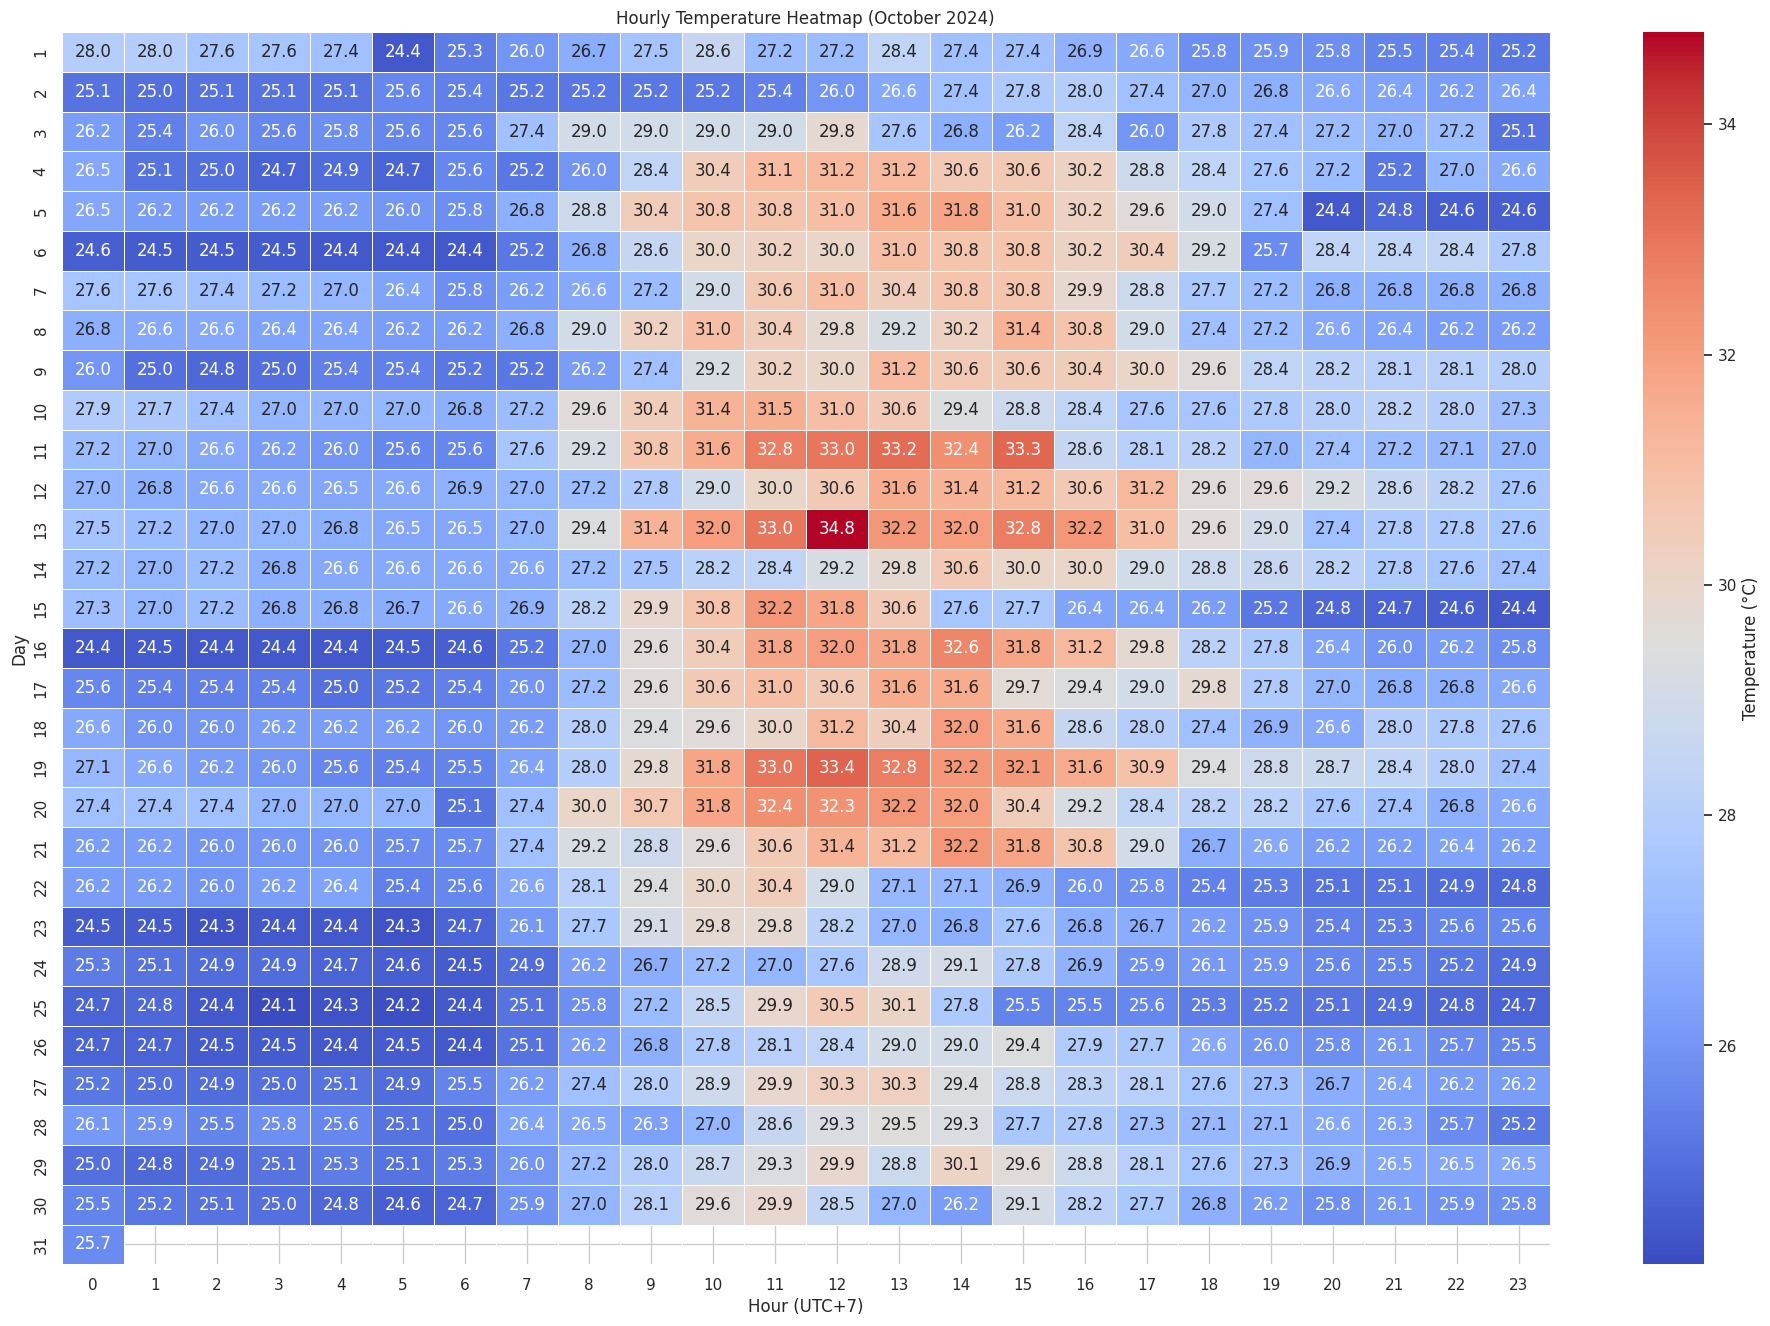

In [24]:
# Set seaborn theme
sns.set_theme(style="whitegrid")

# Set time period for a single month, e.g., October 2024
start = datetime(2024, 12, 1)
end = datetime(2024, 12, 31)

# Get hourly data and calculate daily average temperature for the specified month
data = Hourly(96805, start, end, "Asia/Jakarta").fetch()
data['date'] = data.index.date  # Konversi indeks ke tanggal untuk pengelompokan harian
data['day'] = data.index.day
data['hour'] = data.index.hour

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
temperature_pivot = data.pivot_table(index='day', columns='hour', values='temp')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="coolwarm",
            cbar_kws={'label': 'Temperature (°C)'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Temperature Heatmap (October 2024)')

# Menampilkan heatmap
plt.savefig("Temp_month_Meteostat.jpg")
plt.show()


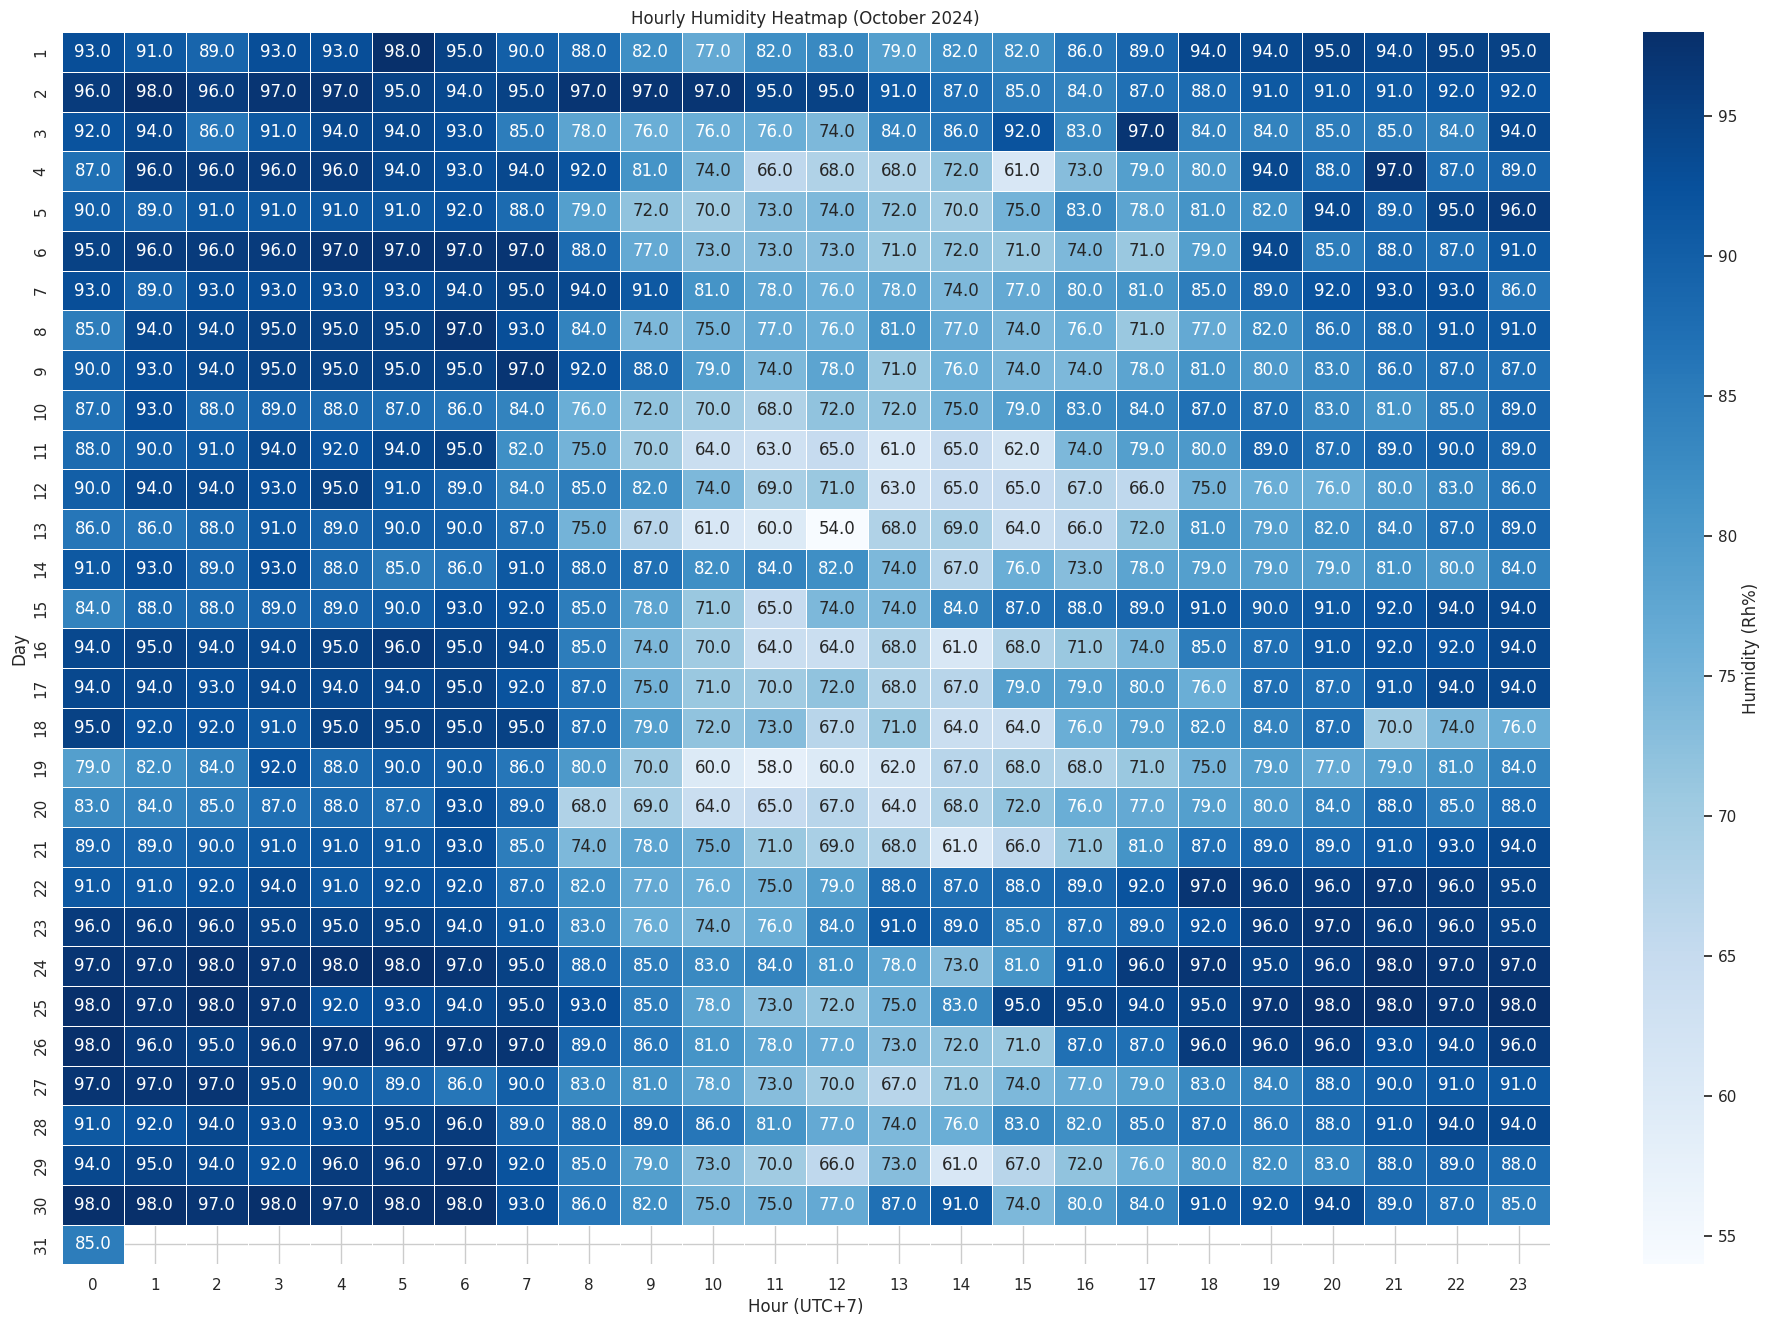

In [25]:

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
humidity_pivot = data.pivot_table(index='day', columns='hour', values='rhum')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="Blues",
            cbar_kws={'label': 'Humidity (Rh%)'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Humidity Heatmap (October 2024)')

# Menampilkan heatmap
plt.show()

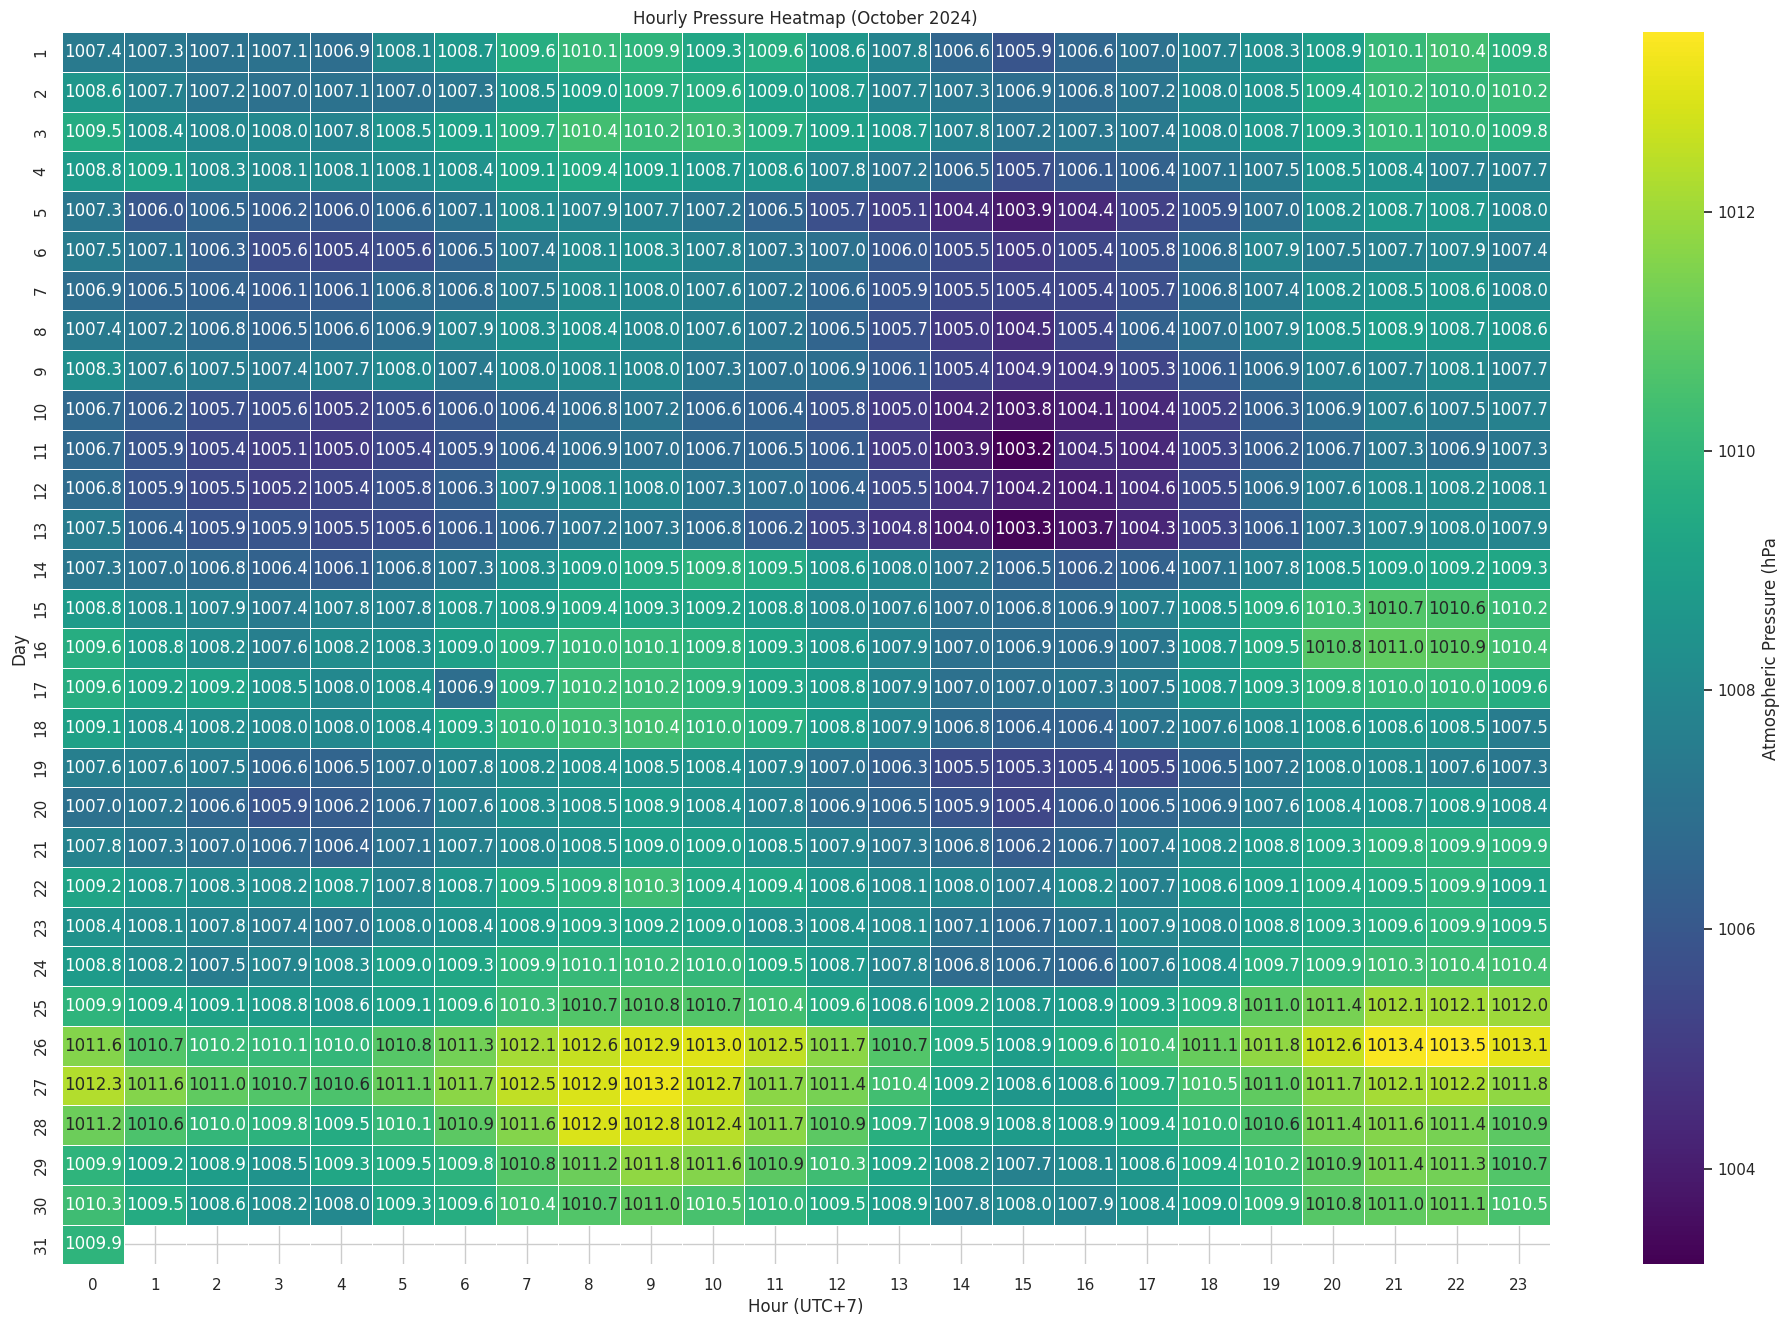

In [26]:

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
press_pivot = data.pivot_table(index='day', columns='hour', values='pres')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(press_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="viridis",
            cbar_kws={'label': 'Atmospheric Pressure (hPa'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Pressure Heatmap (October 2024)')

# Menampilkan heatmap
plt.show()

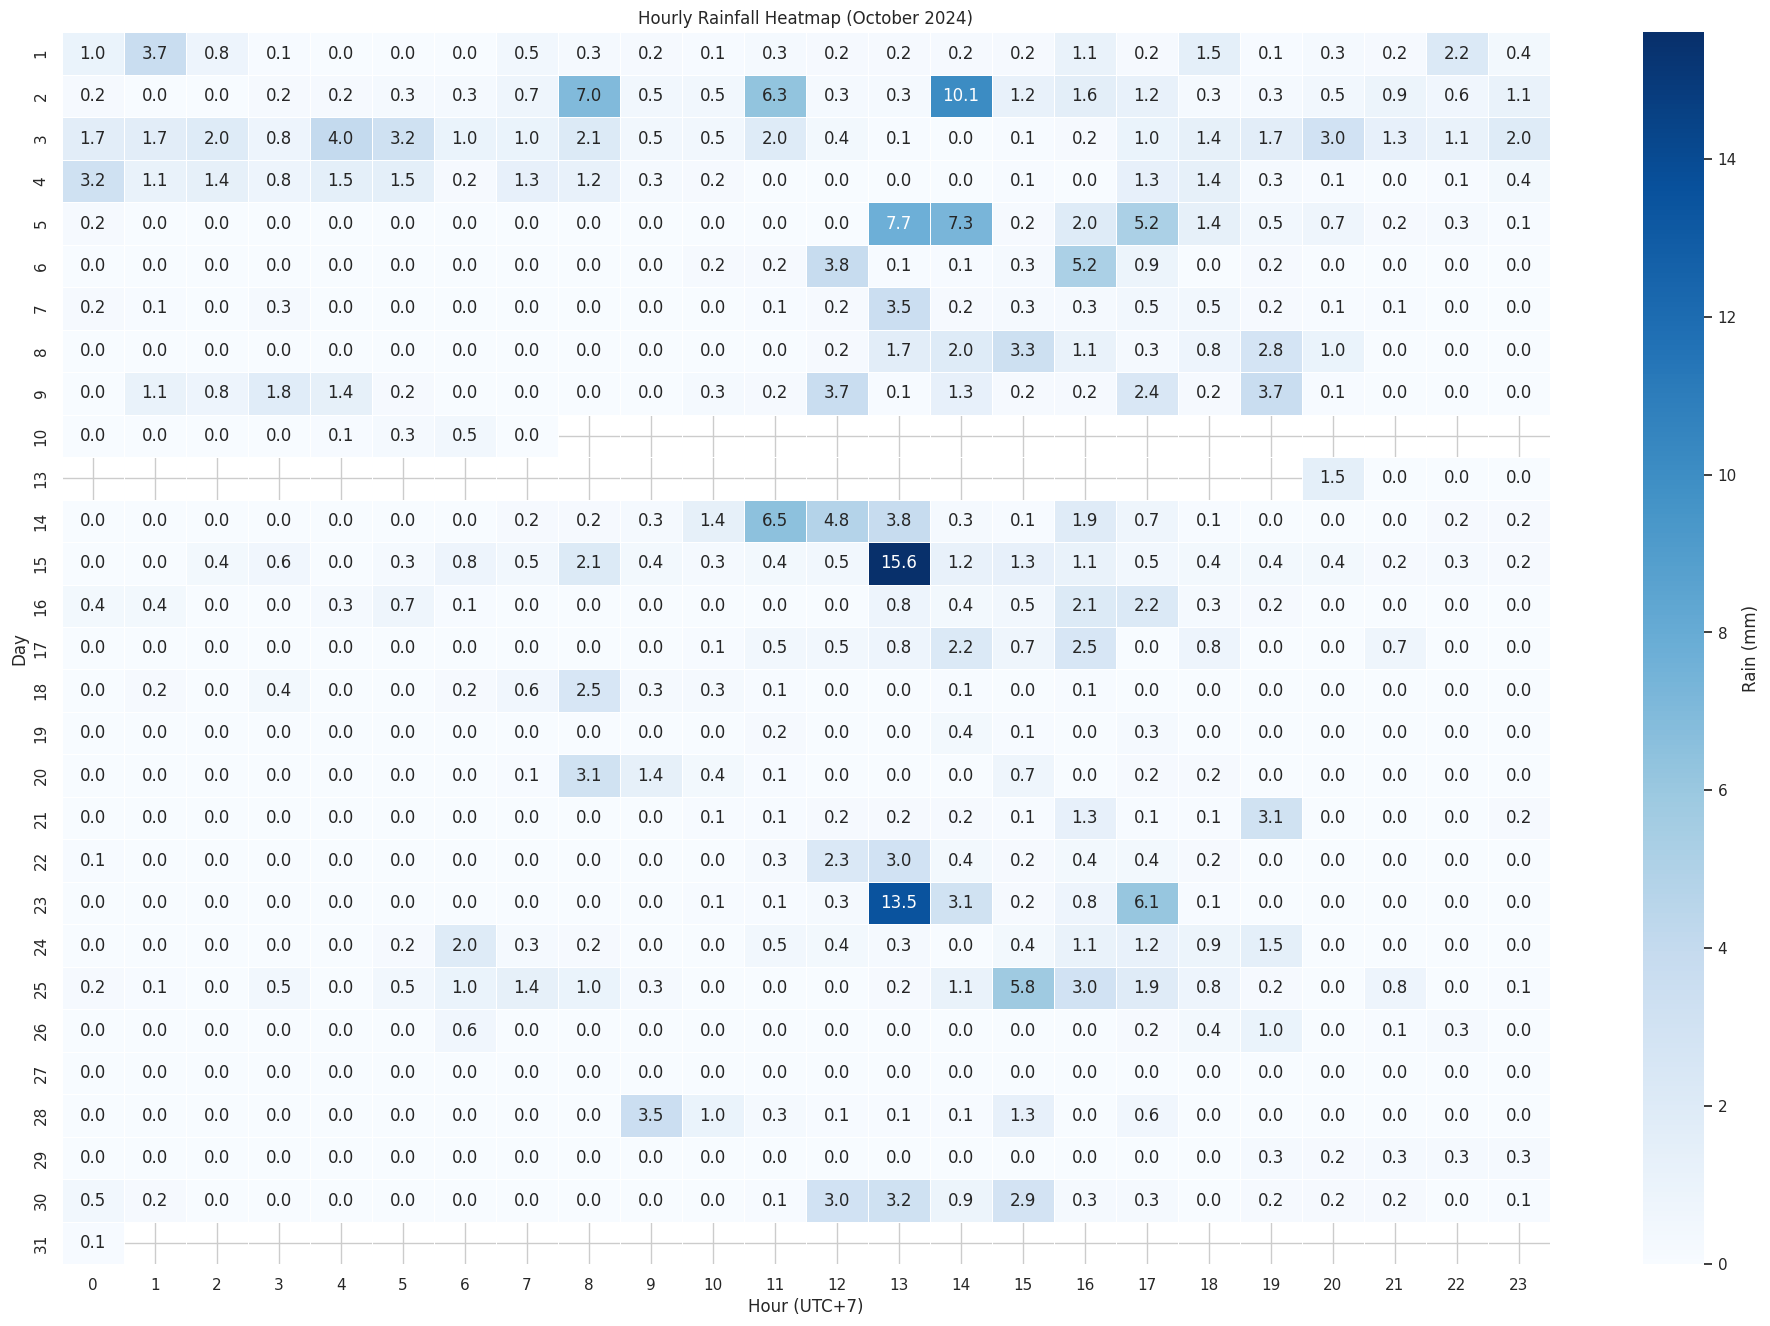

In [27]:

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
rain_pivot = data.pivot_table(index='day', columns='hour', values='prcp')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rain_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="Blues",
            cbar_kws={'label': 'Rain (mm)'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Rainfall Heatmap (October 2024)')

# Menampilkan heatmap
plt.show()

In [28]:
data.tail(20)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,date,day,hour
time,,,,,,,,,,,,,,
2024-12-30 05:00:00+07:00,24.6,24.3,98.0,0.0,NaN,40.0,13.3,NaN,1009.3,NaN,3.0,2024-12-30,30,5
2024-12-30 06:00:00+07:00,24.7,24.4,98.0,0.0,NaN,33.0,10.8,NaN,1009.6,NaN,3.0,2024-12-30,30,6
2024-12-30 07:00:00+07:00,25.9,24.7,93.0,0.0,NaN,39.0,7.6,NaN,1010.4,NaN,3.0,2024-12-30,30,7
2024-12-30 08:00:00+07:00,27.0,24.5,86.0,0.0,NaN,14.0,6.5,NaN,1010.7,NaN,3.0,2024-12-30,30,8
2024-12-30 09:00:00+07:00,28.1,24.7,82.0,0.0,NaN,232.0,6.1,NaN,1011.0,NaN,3.0,2024-12-30,30,9
2024-12-30 10:00:00+07:00,29.6,24.7,75.0,0.0,NaN,294.0,7.9,NaN,1010.5,NaN,3.0,2024-12-30,30,10
2024-12-30 11:00:00+07:00,29.9,25.0,75.0,0.1,NaN,214.0,13.3,NaN,1010.0,NaN,7.0,2024-12-30,30,11
2024-12-30 12:00:00+07:00,28.5,24.1,77.0,3.0,NaN,218.0,25.6,NaN,1009.5,NaN,18.0,2024-12-30,30,12
2024-12-30 13:00:00+07:00,27.0,24.6,87.0,3.2,NaN,280.0,32.4,NaN,1008.9,NaN,9.0,2024-12-30,30,13


In [11]:
print("Finish")

Finish


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>